# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $$p(t|d)$$, $$p(w|t)$$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $$p(t|d)$$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $$p(w|t)$$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [1]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers','quotes'))
documents = dataset.data

print(len(documents))
documents[0]

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

# NLTK 데이터 다운로드
nltk.download('stopwords')

# 2-1. 텍스트 클리닝 함수
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'  # 알파벳과 공백만 남기기
    text = re.sub(pattern, '', d)
    return text  # 클리닝된 텍스트 반환

# 2-2. 불용어 제거 함수
def clean_stopword(d):
    stop_words = stopwords.words('english')  # 영어 불용어 목록
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

# 2-3. 최종 전처리 함수
def preprocessing(d):
    return preprocess_string(clean_stopword(clean_text(d)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd

# 3-1. DataFrame 생성
news_df = pd.DataFrame({'article': documents})

# 3-2. 데이터프레임 길이 확인
print("Initial number of articles:", len(news_df))

Initial number of articles: 11314


In [9]:
# 3-3. 빈 문자열 또는 NaN 값 제거
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print("Number of articles after dropna:", len(news_df))

Number of articles after dropna: 11096


In [10]:
# 전처리 함수 적용
news_df['article'] = news_df['article'].apply(preprocessing)

# 전처리 결과 확인
print("First 5 processed articles:")
print(news_df['article'].head())

First 5 processed articles:
0    [sure, stori, bias, disagre, statement, media,...
1    [yeah, expect, peopl, read, actual, accept, ha...
2    [realiz, principl, strongest, point, like, kno...
3    [notwithstand, legitim, fuss, propos, chang, a...
4    [chang, score, playoff, pool, unfortun, dont, ...
Name: article, dtype: object


In [15]:
def clean_stopword(d):
    stop_words = stopwords.words('english')  # 영어 불용어 목록
    # 리스트인 경우 처리
    if isinstance(d, list):
        return [w.lower() for w in d if w not in stop_words and len(w) > 3]
    # 문자열인 경우 처리
    elif isinstance(d, str):
        return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])
    else:
        return d

In [16]:
# 전처리 함수 적용
news_df['article'] = news_df['article'].apply(clean_stopword)

news_df['article']

,article
0,"[sure, stori, bias, disagre, statement, media,..."
1,"[yeah, expect, peopl, read, actual, accept, ha..."
2,"[realiz, principl, strongest, point, like, kno..."
3,"[notwithstand, legitim, fuss, propos, chang, p..."
4,"[chang, score, playoff, pool, unfortun, dont, ..."
...,...
11309,"[danni, rubenstein, isra, journalist, speak, t..."
11310,[]
11311,"[agre, home, clemen, memor, kinda, like, eclip..."
11312,"[deskjet, orang, micro, grappler, updat, kanji..."


In [20]:
def preprocessing(d):
    # 데이터가 문자열인지 확인
    if isinstance(d, str):
        return preprocess_string(clean_stopword(clean_text(d)))
    else:
        # 문자열이 아니면 그대로 반환
        return d

In [21]:
# 전처리 적용
news_df['article'] = news_df['article'].apply(preprocessing)

# 결과 저장 및 확인
tokenized_news = news_df['article']
print("First 5 tokenized articles:")
print(tokenized_news.head())

First 5 tokenized articles:
0    [sure, stori, bias, disagre, statement, media,...
1    [yeah, expect, peopl, read, actual, accept, ha...
2    [realiz, principl, strongest, point, like, kno...
3    [notwithstand, legitim, fuss, propos, chang, p...
4    [chang, score, playoff, pool, unfortun, dont, ...
Name: article, dtype: object


In [22]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))

10920


## Gensim을 이용한 토픽 모델링

In [23]:
from gensim import corpora

dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

print(corpus[1])

[(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)]


### 잠재 의미 분석을 위한 `LsiModel`

In [24]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=20)
topics = lsi_model.print_topics(num_words=4)

for topic in topics:
    print(topic)

(0, '1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + 0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq"')
(1, '0.403*"file" + 0.194*"program" + 0.161*"imag" + 0.127*"avail"')
(2, '0.470*"file" + -0.222*"peopl" + -0.210*"know" + -0.191*"said"')
(3, '0.384*"file" + 0.288*"entri" + -0.266*"imag" + -0.175*"avail"')
(4, '-0.626*"wire" + -0.253*"ground" + -0.191*"circuit" + -0.182*"outlet"')
(5, '-0.367*"imag" + 0.346*"anonym" + -0.344*"jpeg" + 0.189*"internet"')
(6, '-0.406*"entri" + 0.403*"file" + -0.238*"program" + 0.186*"jpeg"')
(7, '-0.292*"drive" + 0.270*"anonym" + -0.214*"stephanopoulo" + -0.180*"presid"')
(8, '-0.384*"stephanopoulo" + 0.318*"drive" + -0.266*"presid" + -0.179*"imag"')
(9, '0.304*"stephanopoulo" + -0.266*"team" + -0.243*"hockei" + -0.219*"game"')
(10, '0.405*"drive" + -0.313*"widget" + 0.221*"disk" + 0.182*"entri"')
(11, '-0.289*"launch" + -0.265*"space" + 0.205*"hockei" + 0.200*"stephanopoulo"')
(12, '-

In [25]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LsiModel(corpus, id2word=dictionary, num_topics=num_topics)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)

  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.4203261662808665, 0.42953804230454057, 0.4017297075784489, 0.419653107883062, 0.42461796033717597]


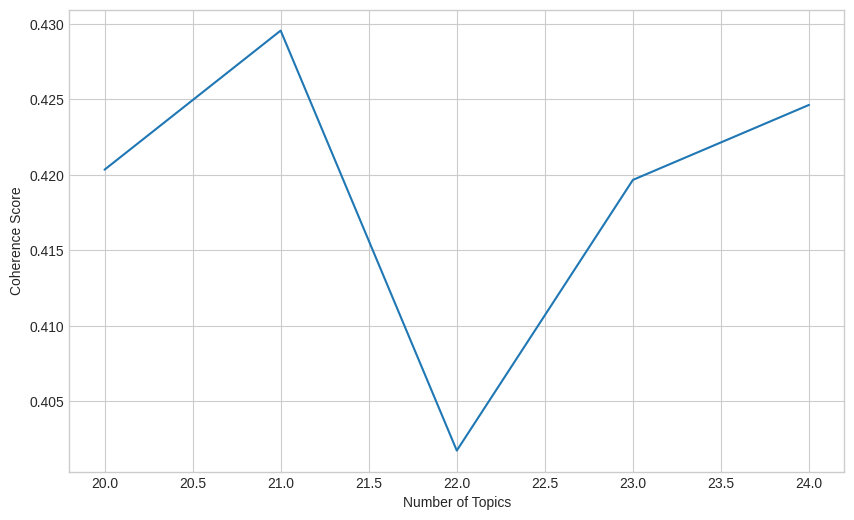

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [28]:
lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=22)
topics = lsi_model.print_topics(num_topics=22)

for topic in topics:
    print(topic)

(0, '1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + 0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + 0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + 0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"')
(1, '0.403*"file" + 0.194*"program" + 0.161*"imag" + 0.127*"avail" + 0.123*"peopl" + 0.121*"inform" + 0.120*"entri" + 0.118*"includ" + 0.113*"work" + 0.110*"like"')
(2, '-0.470*"file" + 0.222*"peopl" + 0.210*"know" + 0.191*"said" + 0.178*"dont" + -0.166*"entri" + 0.158*"think" + 0.146*"stephanopoulo" + -0.135*"imag" + 0.124*"time"')
(3, '-0.384*"file" + -0.288*"entri" + 0.266*"imag" + 0.175*"avail" + 0.140*"data" + 0.128*"version" + 0.116*"wire" + -0.115*"onam" + -0.112*"said" + 0.111*"window"')
(4, '0.626*"wire" + 0.253*"ground" + 0.191*"circuit" + 0.182*"outlet" + 0.1

### 잠재 디리클레 할당을 위한 `LdaModel`

In [29]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, id2word=dictionary, num_topics=20)
topics = lda_model.print_topics()

for topic in topics:
    print(topic)

(0, '0.030*"game" + 0.023*"team" + 0.017*"plai" + 0.013*"player" + 0.010*"year" + 0.010*"season" + 0.009*"score" + 0.007*"hockei" + 0.007*"period" + 0.007*"king"')
(1, '0.011*"peopl" + 0.008*"state" + 0.008*"right" + 0.006*"dont" + 0.006*"think" + 0.006*"govern" + 0.005*"mean" + 0.005*"time" + 0.004*"like" + 0.004*"countri"')
(2, '0.009*"dont" + 0.008*"time" + 0.008*"like" + 0.008*"think" + 0.007*"want" + 0.006*"look" + 0.006*"good" + 0.005*"peopl" + 0.005*"work" + 0.005*"know"')
(3, '0.009*"espn" + 0.007*"francisco" + 0.007*"yanke" + 0.006*"offic" + 0.006*"basebal" + 0.005*"tiger" + 0.005*"brave" + 0.005*"hong" + 0.005*"kong" + 0.004*"seagat"')
(4, '0.016*"version" + 0.015*"avail" + 0.013*"file" + 0.013*"program" + 0.010*"driver" + 0.009*"packag" + 0.008*"imag" + 0.008*"includ" + 0.008*"card" + 0.008*"support"')
(5, '0.009*"appl" + 0.008*"keyboard" + 0.008*"displai" + 0.007*"softwar" + 0.006*"includ" + 0.006*"data" + 0.006*"port" + 0.005*"list" + 0.005*"color" + 0.005*"inform"')
(6, '

In [30]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics)
  coherence = CoherenceModel(model=model,
                             texts=news_texts,
                             dictionary=dictionary)

  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.4571412925020278, 0.48420274657180973, 0.5119060655051659, 0.4793066484852228, 0.5185615487529082]


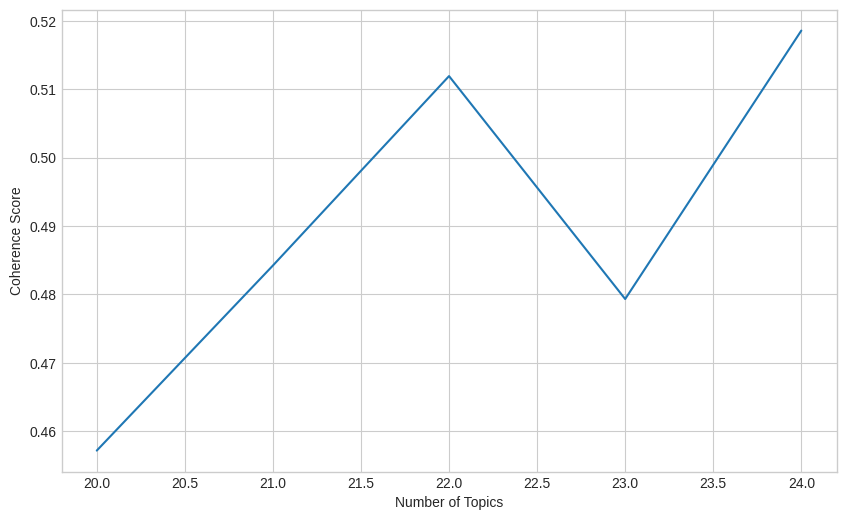

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [32]:
lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=23)
topics = lsi_model.print_topics(num_topics=23)

for topic in topics:
    print(topic)

(0, '1.000*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.008*"mgvgvgvgvgvgvgvgvgvgvgvgvgvgvgv" + 0.005*"maxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.003*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxaxq" + 0.002*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxf" + 0.002*"mqaxaxaxaxaxaxaxaxaxaxaxaxaxax" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxasqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxasq" + 0.001*"maxaxaxaxaxaxaxaxaxaxaxaxaxaxqqf"')
(1, '0.403*"file" + 0.194*"program" + 0.161*"imag" + 0.127*"avail" + 0.123*"peopl" + 0.121*"inform" + 0.120*"entri" + 0.118*"includ" + 0.113*"work" + 0.110*"like"')
(2, '-0.470*"file" + 0.222*"peopl" + 0.210*"know" + 0.191*"said" + 0.178*"dont" + -0.166*"entri" + 0.158*"think" + 0.146*"stephanopoulo" + -0.135*"imag" + 0.124*"time"')
(3, '-0.384*"file" + -0.288*"entri" + 0.266*"imag" + 0.175*"avail" + 0.140*"data" + 0.128*"version" + 0.116*"wire" + -0.115*"onam" + -0.112*"said" + 0.111*"window"')
(4, '-0.626*"wire" + -0.253*"ground" + -0.191*"circuit" + -0.182*"outlet" +

## 토픽 모델링 시각화

In [ ]:
!pip install pyLDAvis


In [35]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# LDA 시각화
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.126471  0.128086       1        1  14.967412
1      0.103139  0.151009       2        1  14.516088
13     0.049208  0.174554       3        1   8.826318
7      0.067969  0.088009       4        1   8.709893
14     0.143337 -0.102929       5        1   8.609715
12     0.108560 -0.061830       6        1   6.485005
2      0.064399  0.098806       7        1   5.532051
4      0.096033 -0.163775       8        1   5.328983
0     -0.034050  0.145402       9        1   5.144334
5      0.074650 -0.133261      10        1   4.037002
9      0.042951 -0.059112      11        1   4.010353
17     0.011455 -0.072585      12        1   3.694036
6      0.002119 -0.086496      13        1   3.227642
19     0.004448 -0.089361      14        1   2.465777
8     -0.128572 -0.033670      15        1   0.896767
11    -0.175937 -0.049967      16        1   0.842235
3     -0.128215  0.047043      17        1   0.837632
18    -0.094702  0.008162      18        1   0.672219
16    -0.146356 -0.018584      19        1   0.633317
10    -0.186907  0.030499      20        1   0.563222, topic_info=           Term         Freq        Total Category  logprob  loglift
125       drive  1616.000000  1616.000000  Default  30.0000  30.0000
222        file  3121.000000  3121.000000  Default  29.0000  29.0000
2270       game  1611.000000  1611.000000  Default  28.0000  28.0000
1867     window  1983.000000  1983.000000  Default  27.0000  27.0000
2176       team  1204.000000  1204.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
9851  household    10.515782    26.472951  Topic20  -6.1016   4.2560
2328       kill    15.074078   859.134589  Topic20  -5.7415   1.1363
165        good    15.182895  2608.198730  Topic20  -5.7343   0.0330
96         like    14.897663  4656.182086  Topic20  -5.7533  -0.5655
179        time    13.060902  3792.576384  Topic20  -5.8849  -0.4919

[1512 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
5677      18  0.859334   abridg
198        1  0.674073  absolut
198        2  0.098246  absolut
198        3  0.024561  absolut
198        4  0.024561  absolut
...      ...       ...      ...
5960      15  0.279529  zionist
1902      10  0.878744     zoom
1902      11  0.058583     zoom
1902      19  0.019528     zoom
16083     16  0.807530    zubov

[8139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 2, 14, 8, 15, 13, 3, 5, 1, 6, 10, 18, 7, 20, 9, 12, 4, 19, 17, 11])